$\langle \hat{S^x}\rangle\vert_t$ over frequncies

# Define functions

In [8]:
def drive(t, args):
    h0, h, w = args['h0'], args['h'], args['omega']
    return h0 + h * np.cos(w * t)

def get_ham_tss(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/N                                    # kacNorm
    H0 = kn * sz **2
    H1 = 2 * sx
    return H0,H1,sx,sy,sz

def run_dynm_tss(w,N):
    h = 1/4 * freezing_pts[0] * w
    params = {'h0':np.pi/32, 'h':h, 'omega':w}
    T = 2 * np.pi/w
    times = np.linspace(0,30*T,100)
        
    H0, H1, Sx, Sy, Sz = get_ham_tss(N)
    
    en, st = H1.eigenstates()
    #a = np.where(np.isclose(en, 1.0, rtol=1e-05, atol=1e-08))
    #print("en",en,"\npoint\n", a[0][0])
    a = np.where(np.isclose(en, max(en)))
    grket = st[a[0][0]]
    
    H = [H0,[H1,drive]]

    S2 =  Sx * Sx + Sy * Sy + Sz * Sz 
    out = mesolve(H, grket, times,[], [H1/(2*N)], args = params)
    return np.average(out.expect)

print("Funcs defined !")

Funcs defined !


In [ ]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)


plt.rcParams.update({"figure.figsize": (10, 6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 13,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.00})



if __name__ == '__main__':
    nprocs = 2       
    N = 2              #total spin in TSS
    h0 = np.pi/32
    ws = np.linspace(1,90,100)
    
    p = Pool(processes = nprocs)
    print("running for TSS spin=",N," with", nprocs," processors!")
    
    data = np.array(p.starmap(run_dynm_tss,tqdm([(w,N) for w in ws])))
    
    plt.plot(ws, data)
    plt.ylabel(r"$\overline{\langle S^x \rangle}$")
    plt.xlabel(r"$\omega$")
    plt.tick_params(which='both', axis="x", direction="in")
    plt.tick_params(which='both', axis="y", direction="in")
    plt.show()

#### Multiple N

running for TSS spin= 10  with 2  processors!
running for TSS spin= 20  with 2  processors!


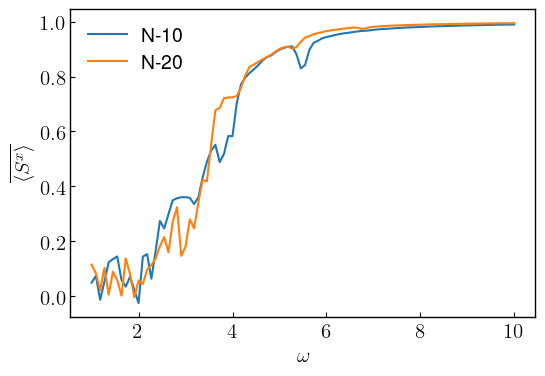

CPU times: user 357 ms, sys: 78.1 ms, total: 435 ms
Wall time: 35 s


In [9]:
%%time
from qutip import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from multiprocessing import Pool
from scipy.special import j0, jn_zeros
import numpy as np
freezing_pts = jn_zeros(0, 5)


plt.rcParams.update({"figure.figsize": (6, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 15,"font.sans-serif": ["Helvetica"], "axes.edgecolor": "black", "axes.linewidth": 1.00})



if __name__ == '__main__':
    nprocs = 2       
    Ns = [10,20]              #total spin in TSS
    h0 = np.pi/32
    ws = np.linspace(1,10,100)
    
    for nn,N in enumerate(Ns):
        p = Pool(processes = nprocs)
        print("running for TSS spin=",N," with", nprocs," processors!")

        data = np.array(p.starmap(run_dynm_tss,[(w,N) for w in ws]))
        plt.plot(ws, data, label = fr"N-{N}")
        
    plt.ylabel(r"$\overline{\langle S^x \rangle}$")
    plt.xlabel(r"$\omega$")
    plt.tick_params(which='both', axis="x", direction="in")
    plt.tick_params(which='both', axis="y", direction="in")
    plt.legend(frameon = False, fontsize = 14)
    #plt.savefig('sx_multN.jpeg',dpi = 600)
    #plt.savefig('sx_multN.svg',dpi = 600)
    plt.show()